In [1]:
import kdezero
import kdezero.functions as F
from kdezero.models import MLP
import numpy as np

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
test_set = kdezero.datasets.MNIST(train=False)

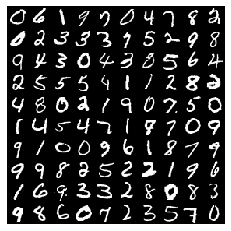

In [3]:
train_set.show()

In [4]:
print(len(train_set))
print(len(test_set))

60000
10000


In [5]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [6]:
hidden_size = 1000

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = kdezero.optimizers.Adam()
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))
model.compile(acc=F.accuracy, optimizer=optimizer)

In [7]:
history = model.fit_generator(train_loader, val_loader=test_loader, max_epoch=5, gpu=True)

set gpu
epoch: 1
train loss: 0.19315780071852107, accuracy: 0.94195
val loss: 0.0925742845312925, accuracy: 0.9703
epoch: 2
train loss: 0.08002862067660317, accuracy: 0.9752333333333333
val loss: 0.08493273644940928, accuracy: 0.9743
epoch: 3
train loss: 0.058260600802799066, accuracy: 0.9814166666666667
val loss: 0.07425147157890023, accuracy: 0.9761
epoch: 4
train loss: 0.04618039728297541, accuracy: 0.9848
val loss: 0.07600703448450076, accuracy: 0.9781
epoch: 5
train loss: 0.036415992970966427, accuracy: 0.9884333333333334
val loss: 0.0747246072609414, accuracy: 0.9785


In [8]:
print(history)
print(history.loss)
print(history.acc)
print(history.val_loss)
print(history.val_acc)

[0.19315780071852107, 0.08002862067660317, 0.058260600802799066, 0.04618039728297541, 0.036415992970966427]
[0.94195, 0.9752333333333333, 0.9814166666666667, 0.9848, 0.9884333333333334]
[0.0925742845312925, 0.08493273644940928, 0.07425147157890023, 0.07600703448450076, 0.0747246072609414]
[0.9703, 0.9743, 0.9761, 0.9781, 0.9785]


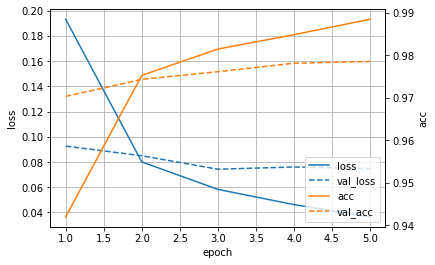

In [9]:
history.plot('sample.png')

In [10]:
model.evaluate(test_loader)

(0.0747246072609414, 0.9785)